## Install and import neccessery libraries

In [ ]:
!pip -q install hypper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


In [5]:
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data

## Read dataset

Example dataset can be loaded directly with predefined functions (it will be downloaded to your local machine). The dataset can consist of NaN values. However, it is important to mention that hypergraph-based algorithms treat all numerical features as categorical (discretization may be useful). Any additional steps for preprocessing are not required.

In [60]:
df, label, _ = read_german_data()
df.head(10)

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   
5   35    male    1    free             NaN              NaN           9055   
6   53    male    2     own      quite rich              NaN           2835   
7   35    male    3    rent          little         moderate           6948   
8   61    male    1     own            rich              NaN           3059   
9   28    male    3     own          little         moderate           5234   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  
5        36            education  good  
6        24  furniture/equipment  good  
7        36                  car  good  
8        12             radio/TV  good  
9        30                  car   bad

## Undersampling

The hypergraph-based undersampling algorithm uses a class-dependent weighting method. A minimal example is presented below. For more details on how undersampling works and what certain parameters do you can visit [documentation](https://hypper-team.github.io/hypper/undersampling.html).

<AxesSubplot:>

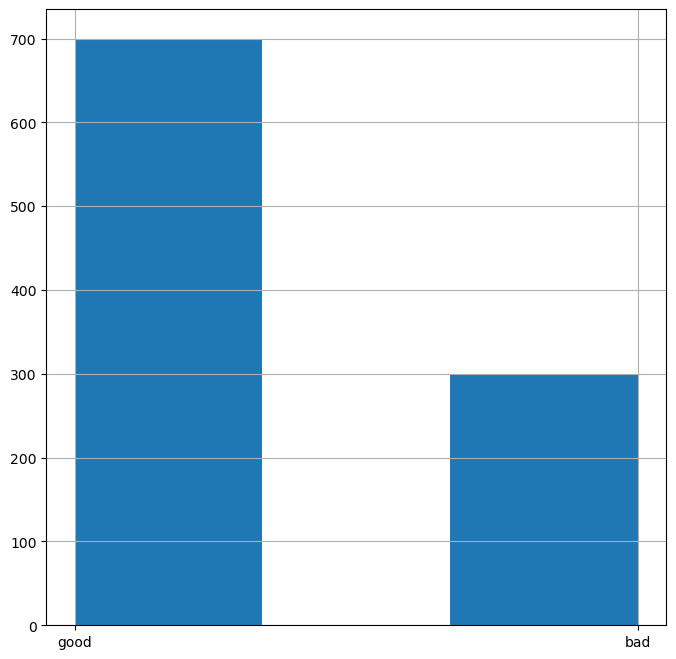

In [7]:
# Class distribution
df['Risk'].hist(bins=3)

In [8]:
cdwu = CDWU(
    weighting_iterations=2,
    weighting_history=True,
    majority_left_threshold=0,
    version=1
)
df_resampled = cdwu.fit_transform(data=df, label_column=label)
df_resampled.head(3)

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
4   53    male    2    free          little           little           4870   

   Duration    Purpose  Risk  
1        48   radio/TV   bad  
2        12  education  good  
4        24        car   bad

<AxesSubplot:>

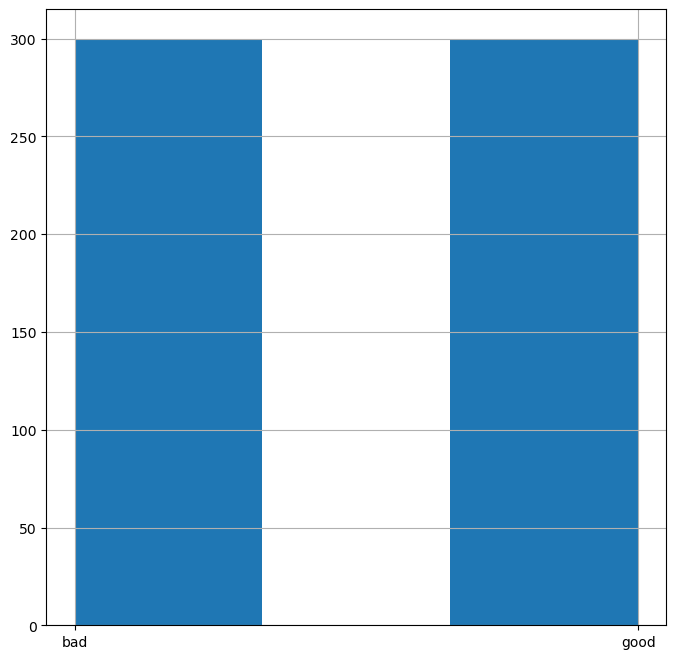

In [9]:
# Class distribution
df_resampled['Risk'].hist(bins=3)

## Feature selection

Hypper implements two approaches for feature selection:
*   using features weights from class-dependent hypergrph weighting,
*   or random walk on hypergraph.

Check [documentation](https://hypper-team.github.io/hypper/feature_selection.html) for more details.

In [10]:
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)
feature_importances = cdwfs.fit_transform(data=df, label_column=label)
feature_importances
#feature_importances.sort_values(by='feature_importance', ascending=False)

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()


feature_importance
Age                         0.049249
Checking account            0.093543
Credit amount               0.224962
Duration                    0.048814
Housing                     0.034683
Job                         0.008565
Purpose                     0.026861
Saving accounts             0.048958
Sex                         0.020417

In [ ]:
rwfs = RandomWalkFS(
    iterations=100,
    walk_length=3,
    scoring_variant='v1_3',
    feature_values=False)
feature_importances = rwfs.fit_transform(data=df, label_column=label)
feature_importances.sort_values(by='feature_importance', ascending=False)

feature_importance
Credit amount                   69.0
Age                             29.0
Duration                        17.0
Purpose                          7.0
Saving accounts                  5.0
Checking account                 4.0
Job                              4.0
Housing                          3.0
Sex                              2.0

In [1]:
!pip -q install hypper

In [8]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data

seed_value = 41
np.random.seed(seed_value)

file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)



# Now 'df' contains the data from your CSV file
print(df)

#X = df.iloc[:, :-1]  # Features (all columns except the last one)
#y = df.iloc[:, -1]   # Labels (last column)

#y = y.astype(int) 

# Now you have your features in X and labels in y
#print("Features:")
#print(X)
#print("\nLabels:")
#print(y)




        aac_1     aac_2     aac_3     aac_4     aac_5     aac_6     aac_7  \
0    0.200000  0.000000  0.000000  0.133333  0.133333  0.000000  0.000000   
1    0.000000  0.052632  0.052632  0.052632  0.157895  0.000000  0.052632   
2    0.052632  0.000000  0.105263  0.052632  0.157895  0.000000  0.000000   
3    0.000000  0.000000  0.052632  0.052632  0.157895  0.000000  0.052632   
4    0.000000  0.000000  0.000000  0.000000  0.200000  0.050000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.071253  0.031941  0.036855  0.061425  0.022113  0.088452  0.024570   
450  0.111732  0.055866  0.033520  0.027933  0.000000  0.044693  0.039106   
451  0.120419  0.078534  0.020942  0.062827  0.000000  0.062827  0.026178   
452  0.075922  0.080260  0.034707  0.073753  0.004338  0.084599  0.032538   
453  0.120253  0.078059  0.023207  0.052743  0.006329  0.086498  0.040084   

        aac_8     aac_9    aac_10  ...    qso_15    qso_16    qso_17  \
0  

In [9]:
import csv

cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)

cdwfs.fit_transform(data=df, label_column="Output")
feature_importances = cdwfs.fit_transform(data=df, label_column="Output")

#feature_importances = feature_importances.sort_values(by='feature_importance', ascending=False)
#print(feature_importances)




C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored 

In [10]:
feature_importances.sort_values(by='feature_importance', ascending=False)

feature_importance
dipep_1             0.149297
dipep_2             0.145849
dipep_3             0.137316
pseudo_2            0.067782
dist_1              0.041991
pseudo_3            0.040604
pseudo_1            0.036666
dist_2              0.032244
dist_8              0.031915
dist_7              0.031701
aac_1               0.031662
dist_6              0.031175
comp_1              0.027903
tran_1              0.024610
dist_9              0.024038
dist_5              0.022928
dist_3              0.017998
dipep_7             0.016482
dipep_6             0.016156
dipep_4             0.015791
dist_4              0.014695
qso_1               0.013501
dipep_5             0.010654
pssm_2              0.010170
tran_2              0.009220
dipep_8             0.008427
pseudo_4            0.006765
comp_2              0.006203
aac_2               0.005995
dipep_9             0.005535
pssm_18             0.003390
pseudo_8            0.003390
qso_20              0.003390
ss_2                0.003390
qso_8               0.003390
ss_3                0.003390
ss_1                0.003390
pssm_85             0.003375
pseudo_6            0.003361
pseudo_7            0.003302
pseudo_9            0.003272
tran_3              0.003241
comp_4              0.003138
aac_4               0.003123
ss_4                0.003123
tran_6              0.003107
comp_6              0.003094
ss_5                0.003080
comp_3              0.003035
tran_5              0.003034
tran_4              0.003034
comp_5              0.003019
aac_6               0.003006
aac_8               0.002988
aac_7               0.002872
aac_9               0.002842
aac_3               0.002811
pseudo_5            0.002773
aac_5               0.002596
ss_6                0.001956

In [11]:
#copy the "feature_importances" dataframe into new dataframe "feat_imp"
feat_imp = feature_importances.copy()


In [12]:
# see index values of the "feat_imp" dataframe
feat_imp.index.values

array(['aac_1', 'aac_2', 'aac_3', 'aac_4', 'aac_5', 'aac_6', 'aac_7',
       'aac_8', 'aac_9', 'comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5',
       'comp_6', 'dipep_1', 'dipep_2', 'dipep_3', 'dipep_4', 'dipep_5',
       'dipep_6', 'dipep_7', 'dipep_8', 'dipep_9', 'dist_1', 'dist_2',
       'dist_3', 'dist_4', 'dist_5', 'dist_6', 'dist_7', 'dist_8',
       'dist_9', 'pseudo_1', 'pseudo_2', 'pseudo_3', 'pseudo_4',
       'pseudo_5', 'pseudo_6', 'pseudo_7', 'pseudo_8', 'pseudo_9',
       'pssm_18', 'pssm_2', 'pssm_85', 'qso_1', 'qso_20', 'qso_8', 'ss_1',
       'ss_2', 'ss_3', 'ss_4', 'ss_5', 'ss_6', 'tran_1', 'tran_2',
       'tran_3', 'tran_4', 'tran_5', 'tran_6'], dtype=object)

In [13]:
# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp['feature'] = feat_imp.index.values
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp = feat_imp[['feature', 'feature_importance']]

In [14]:
# check column names
feat_imp.columns

Index(['feature', 'feature_importance'], dtype='object')

In [15]:
df_sorted = feat_imp.sort_values(by='feature_importance', ascending=False)

In [17]:

df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp.csv', index=False)

In [5]:
from hypper.plotting import *


In [6]:
import hypernetx

In [17]:
# Specify the file path
csv_file_path = "D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/example1.csv"

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(feature_importances)
    

In [60]:
from logging import DEBUG

from matplotlib import pyplot as plt

from hypper.hypergraph import HyperGraph
from hypper.data import read_sample_data
from hypper.plotting import HNX_Hypergraph

# Read data
df, label, _ = read_sample_data()
print(df.head(10))

# Create hypergraph
hypergraph_representation = HyperGraph(
    input_data=df,
    label=label,
    random_seed=42,
    verbosity=DEBUG,
)

# Display hypergraph representation
hnx_representation = HNX_Hypergraph(
    hypergraph_representation
)



          x1 x2  y
index             
A      alpha  y  1
B      alpha  x  1
C      alpha  y  1
D       beta  x  1
E       beta  y  0
F      gamma  x  0
G      gamma  y  0
H      gamma  x  0
I      gamma  x  0
[2024-01-15 10:01:28|hypper.hypergraph|INFO] - Input data shape: (9, 3).
[2024-01-15 10:01:28|hypper.hypergraph|INFO] - Input file in memory size: 0.002 MB.
[2024-01-15 10:01:28|hypper.hypergraph|DEBUG] - Creating hypergraph-based data representation ...
[2024-01-15 10:01:28|hypper.hypergraph|DEBUG] - Hypergraph-based data representation created.


C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


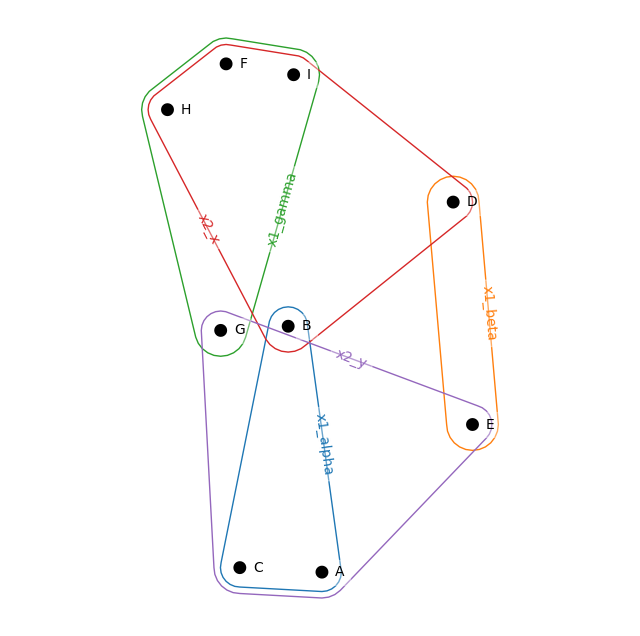

In [61]:
# Standard diagram
hnx_representation.draw()
plt.show()



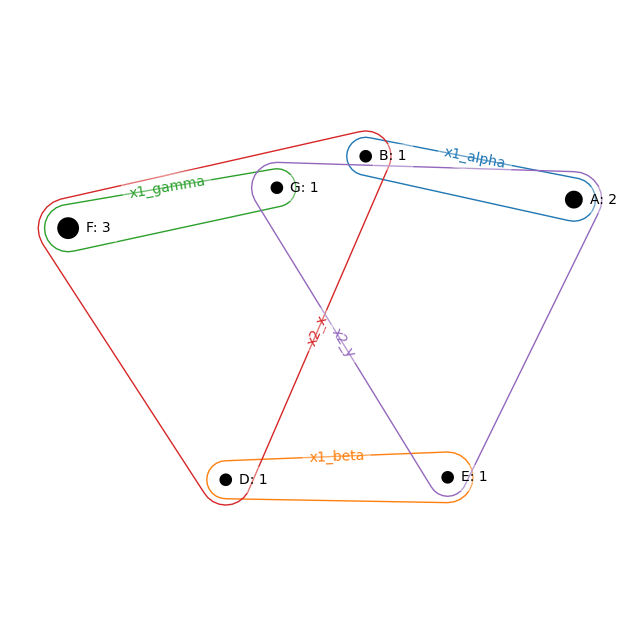

In [62]:
# Drawing with collapsed nodes
hnx_representation.draw_collapse_nodes()
plt.show()



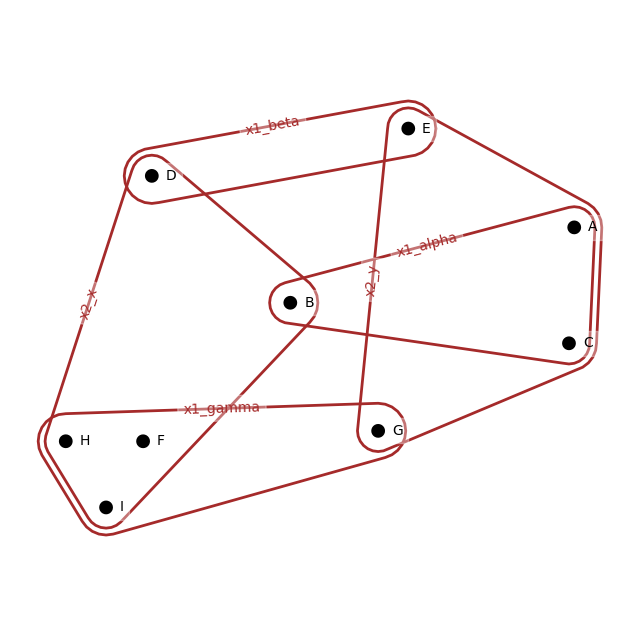

In [63]:
# Drawing with HNX specific parameters
# https://hypernetx.readthedocs.io/en/latest/drawing/drawing.html
hnx_representation.draw(
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
    },
)
plt.show()

In [85]:
import pandas as pd

from logging import DEBUG

from matplotlib import pyplot as plt

from hypper.hypergraph import HyperGraph
from hypper.data import read_sample_data
from hypper.plotting import HNX_Hypergraph

# Read data
#df, label, _ = read_sample_data()

#file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'
file_path = 'D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergrap_generate.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print(df)

# Select a subset of columns
#subset_columns = ['aac_1', 'aac_4', 'qso_15', 'qso_16', 'pssm_2', 'pssm_295', 'Output']

# Create a new DataFrame with the selected columns
#subset_df = df[subset_columns]
# Get column names as a list
#df = df.columns               



# Specify the column to convert to rows
#column_to_convert = 'feature_importance'

# Extract values from the specified column
#values_to_convert = [item[column_to_convert] for item in df]

# Create a new DataFrame with the values as a row
#transposed_df = pd.DataFrame([values_to_convert], columns=[column_to_convert])

#print(transposed_df)

  SMQ020  RIDAGEYR RIAGENDR CVD_risk
0     No         2     Male      Yes
1    Yes         2     Male      Yes
2    Yes         4     Male      Yes
3    Yes         4   Female      Yes
4    Yes         4     Male      Yes
5    Yes         4   Female       No
6     No         1   Female       No
7    Yes         2     Male       No
8     No         1     Male       No
9     No         3     Male       No


In [1]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'City': ['New York', 'San Francisco', 'Los Angeles']
})

# Specify the column to convert to a row
column_to_convert = 'Age'

# Extract values from the specified column
values_to_convert = df[column_to_convert].tolist()

# Create a new DataFrame with the values as a single row
transposed_df = pd.DataFrame([values_to_convert], columns=[column_to_convert])

print(transposed_df)


ValueError: 1 columns passed, passed data had 3 columns

In [86]:
# Create hypergraph
hypergraph_representation = HyperGraph(
    #input_data=df,
    input_data=df,
    label="CVD_risk",
    random_seed=42,
    verbosity=DEBUG,
)
hypergraph_representation
# Display hypergraph representation
hnx_representation = HNX_Hypergraph(
    hypergraph_representation
)


[2025-06-04 15:06:24|hypper.hypergraph|INFO] - Input data shape: (10, 4).
[2025-06-04 15:06:24|hypper.hypergraph|INFO] - Input file in memory size: 0.002 MB.
[2025-06-04 15:06:24|hypper.hypergraph|DEBUG] - Creating hypergraph-based data representation ...
[2025-06-04 15:06:24|hypper.hypergraph|DEBUG] - Hypergraph-based data representation created.


C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


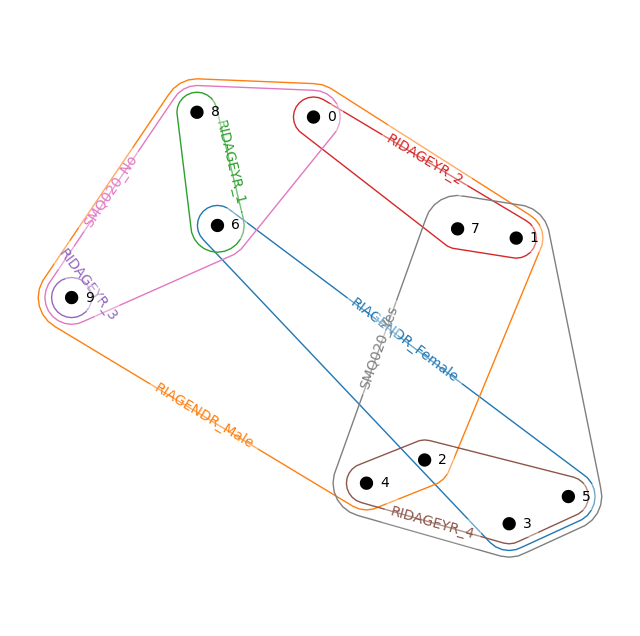

In [87]:
# Standard diagram
hnx_representation.draw()
plt.show()


C:\Users\surai\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


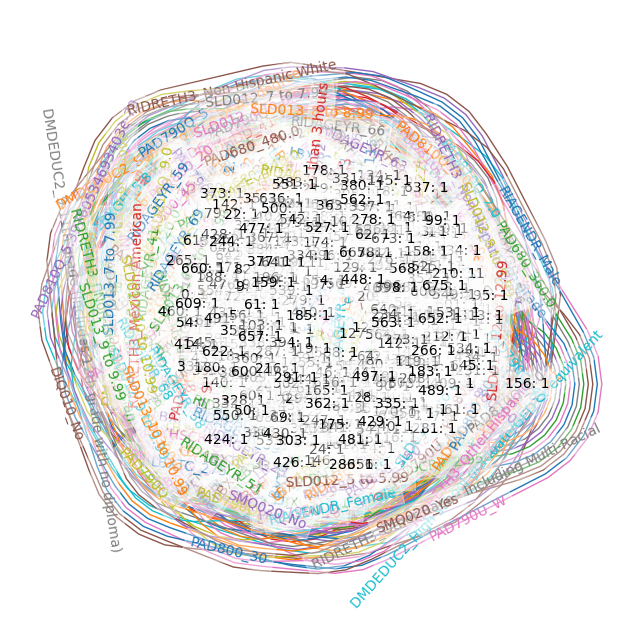

In [8]:
# Drawing with collapsed nodes
hnx_representation.draw_collapse_nodes()
plt.show()

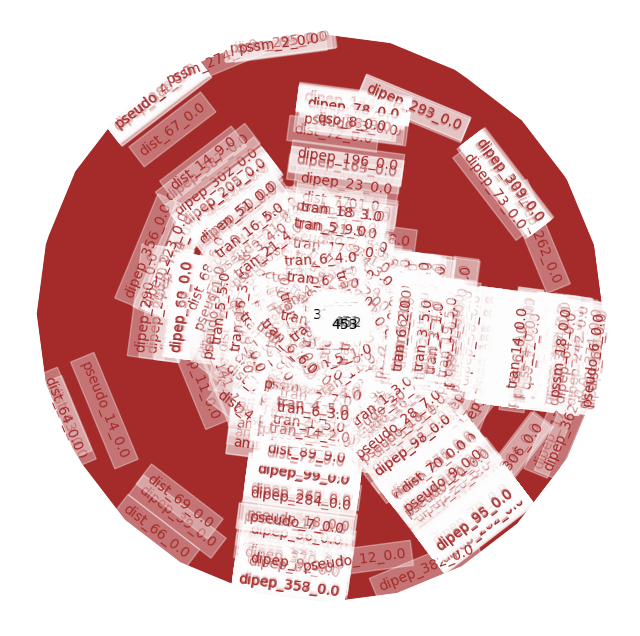

In [15]:
# Drawing with HNX specific parameters
# https://hypernetx.readthedocs.io/en/latest/drawing/drawing.html
hnx_representation.draw(
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
    },
)
plt.show()

In [13]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
# Read data
df, label, _ = read_german_data()
#print(df.head(10))

# Replace column names
df.columns = ['A', 'A11', 'AA1', '3A123', 'A5', 'A6', 'A7', 'A8', 'A9', 'Risk']
print(df.head(10))

# Run CDWFS
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)
feature_importances = cdwfs.fit_transform(data=df, label_column=label)
feature_importances.sort_values(by='feature_importance', ascending=False)

    A     A11  AA1 3A123          A5        A6    A7  A8                   A9  \
0  67    male    2   own         NaN    little  1169   6             radio/TV   
1  22  female    2   own      little  moderate  5951  48             radio/TV   
2  49    male    1   own      little       NaN  2096  12            education   
3  45    male    2  free      little    little  7882  42  furniture/equipment   
4  53    male    2  free      little    little  4870  24                  car   
5  35    male    1  free         NaN       NaN  9055  36            education   
6  53    male    2   own  quite rich       NaN  2835  24  furniture/equipment   
7  35    male    3  rent      little  moderate  6948  36                  car   
8  61    male    1   own        rich       NaN  3059  12             radio/TV   
9  28    male    3   own      little  moderate  5234  30                  car   

   Risk  
0  good  
1   bad  
2  good  
3  good  
4   bad  
5  good  
6  good  
7  good  
8  good  
9   bad 

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()


feature_importance
A            0.556052

In [11]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 603 unique column names
column_names_list = generate_unique_column_names(603)

# Print the result


column_names_list[-1] = 'Output'
#print(column_names_list)
file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)

        aac_1     aac_2     aac_3     aac_4     aac_5     aac_6     aac_7  \
0    0.200000  0.000000  0.000000  0.133333  0.133333  0.000000  0.000000   
1    0.000000  0.052632  0.052632  0.052632  0.157895  0.000000  0.052632   
2    0.052632  0.000000  0.105263  0.052632  0.157895  0.000000  0.000000   
3    0.000000  0.000000  0.052632  0.052632  0.157895  0.000000  0.052632   
4    0.000000  0.000000  0.000000  0.000000  0.200000  0.050000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.071253  0.031941  0.036855  0.061425  0.022113  0.088452  0.024570   
450  0.111732  0.055866  0.033520  0.027933  0.000000  0.044693  0.039106   
451  0.120419  0.078534  0.020942  0.062827  0.000000  0.062827  0.026178   
452  0.075922  0.080260  0.034707  0.073753  0.004338  0.084599  0.032538   
453  0.120253  0.078059  0.023207  0.052743  0.006329  0.086498  0.040084   

        aac_8     aac_9    aac_10  ...    qso_15    qso_16    qso_17  \
0  

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [26]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 23 unique column names
column_names_list = generate_unique_column_names(23)

# Print the result


column_names_list[-1] = 'CVD_risk'
#column_names_list[0] = 'Output'
print("column list")
print(column_names_list)
#print(column_names_list)
file_path = 'D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/balanced_dataset_hypergraph.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

#df['CVD_risk'] = df['CVD_risk'].replace({1: 'Yes', 0: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("Test data ")
numeric_columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)
#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_descretization_10_feat_val.csv', index=False)
df.to_csv('D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/hyp_descretization_10_feat_val.csv', index=False)
df_original = df.copy()
#print(df_original.columns)
df.columns =column_names_list

dummy_cols = df.columns
org_cols = df_original.columns

# Create a hashmap using a dictionary comprehension
column_map = {a: b for a, b in zip(dummy_cols, org_cols)}
print(column_map)

#print(df.columns)


#print(df.head(10))

#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairson_new_col.csv', index=False)


column list
['PMtBM4s6', 'MUdyzjQr', 'gblVoEUR', 'jpKtHeO9', 'AHBkJ61F', '29T52Nq1', 'q6Gu5mVZ', 'dN0gos8p', 'xhLf6YfQ', 'hOsFqY4d', 'pKA9N0Hs', 'ucyZlmzk', 'a48uFSdD', 'wWOHjVny', 'lLtvqjNw', 'kCg8Wqzq', 'gNreMPhZ', 'cib7C6ER', 'R7jG483F', 'Bavh9pf9', 'VlpdA6iX', 'vJ0fvRtj', 'CVD_risk']
    SMQ020       PAD810Q  PAD790Q PAD790U  PAD800        PAD680     SLD012  \
0       No  5.397605e-79        1       W      45  5.397605e-79  7 to 7.99   
1      Yes  5.397605e-79        6       W     120  2.400000e+02  8 to 8.99   
2      Yes  5.397605e-79        1       W     120  4.800000e+02  8 to 8.99   
3      Yes  2.000000e+00        2       D      25  3.000000e+02  6 to 6.99   
4      Yes  5.397605e-79        4       W      30  9.000000e+01  9 to 9.99   
..     ...           ...      ...     ...     ...           ...        ...   
541     No  5.397605e-79       10       D      30  2.400000e+02  7 to 7.99   
542    Yes  5.397605e-79        5       W     180  1.800000e+02  8 to 8.99   
543     N

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [27]:
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)

cdwfs.fit_transform(data=df, label_column="CVD_risk")
feature_importances = cdwfs.fit_transform(data=df, label_column="CVD_risk")
feature_importances

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

feature_importance
29T52Nq1            0.009522
AHBkJ61F            0.004550
Bavh9pf9            0.013921
MUdyzjQr            0.001586
PMtBM4s6            0.026169
R7jG483F            0.031018
VlpdA6iX            0.030495
a48uFSdD            0.017254
cib7C6ER            0.008582
dN0gos8p            0.015688
gNreMPhZ            0.019763
gblVoEUR            0.002515
hOsFqY4d            0.044232
jpKtHeO9            0.007547
kCg8Wqzq            0.012238
lLtvqjNw            0.007782
pKA9N0Hs            0.016193
q6Gu5mVZ            0.016411
ucyZlmzk            0.008011
vJ0fvRtj            0.003411
wWOHjVny            0.012872
xhLf6YfQ            0.022321

In [28]:
feat_imp = feature_importances.copy()

In [29]:
feat_imp

feature_importance
29T52Nq1            0.009522
AHBkJ61F            0.004550
Bavh9pf9            0.013921
MUdyzjQr            0.001586
PMtBM4s6            0.026169
R7jG483F            0.031018
VlpdA6iX            0.030495
a48uFSdD            0.017254
cib7C6ER            0.008582
dN0gos8p            0.015688
gNreMPhZ            0.019763
gblVoEUR            0.002515
hOsFqY4d            0.044232
jpKtHeO9            0.007547
kCg8Wqzq            0.012238
lLtvqjNw            0.007782
pKA9N0Hs            0.016193
q6Gu5mVZ            0.016411
ucyZlmzk            0.008011
vJ0fvRtj            0.003411
wWOHjVny            0.012872
xhLf6YfQ            0.022321

In [30]:

# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp['feature'] = feat_imp.index.values
#feat_imp['original_feature'] = df_original.columns

feat_imp.columns

Index(['feature_importance', 'feature'], dtype='object')

In [31]:
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp = feat_imp[['feature', 'feature_importance']]
feat_imp

feature  feature_importance
29T52Nq1  29T52Nq1            0.009522
AHBkJ61F  AHBkJ61F            0.004550
Bavh9pf9  Bavh9pf9            0.013921
MUdyzjQr  MUdyzjQr            0.001586
PMtBM4s6  PMtBM4s6            0.026169
R7jG483F  R7jG483F            0.031018
VlpdA6iX  VlpdA6iX            0.030495
a48uFSdD  a48uFSdD            0.017254
cib7C6ER  cib7C6ER            0.008582
dN0gos8p  dN0gos8p            0.015688
gNreMPhZ  gNreMPhZ            0.019763
gblVoEUR  gblVoEUR            0.002515
hOsFqY4d  hOsFqY4d            0.044232
jpKtHeO9  jpKtHeO9            0.007547
kCg8Wqzq  kCg8Wqzq            0.012238
lLtvqjNw  lLtvqjNw            0.007782
pKA9N0Hs  pKA9N0Hs            0.016193
q6Gu5mVZ  q6Gu5mVZ            0.016411
ucyZlmzk  ucyZlmzk            0.008011
vJ0fvRtj  vJ0fvRtj            0.003411
wWOHjVny  wWOHjVny            0.012872
xhLf6YfQ  xhLf6YfQ            0.022321

In [32]:
df_sorted = feat_imp.sort_values(by='feature_importance', ascending=False)

#df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp_de10.csv', index=False)

In [33]:
df_sorted

feature  feature_importance
hOsFqY4d  hOsFqY4d            0.044232
R7jG483F  R7jG483F            0.031018
VlpdA6iX  VlpdA6iX            0.030495
PMtBM4s6  PMtBM4s6            0.026169
xhLf6YfQ  xhLf6YfQ            0.022321
gNreMPhZ  gNreMPhZ            0.019763
a48uFSdD  a48uFSdD            0.017254
q6Gu5mVZ  q6Gu5mVZ            0.016411
pKA9N0Hs  pKA9N0Hs            0.016193
dN0gos8p  dN0gos8p            0.015688
Bavh9pf9  Bavh9pf9            0.013921
wWOHjVny  wWOHjVny            0.012872
kCg8Wqzq  kCg8Wqzq            0.012238
29T52Nq1  29T52Nq1            0.009522
cib7C6ER  cib7C6ER            0.008582
ucyZlmzk  ucyZlmzk            0.008011
lLtvqjNw  lLtvqjNw            0.007782
jpKtHeO9  jpKtHeO9            0.007547
AHBkJ61F  AHBkJ61F            0.004550
vJ0fvRtj  vJ0fvRtj            0.003411
gblVoEUR  gblVoEUR            0.002515
MUdyzjQr  MUdyzjQr            0.001586

In [34]:
rows = df_sorted.shape[0]
df_backup = df_sorted.copy()
df_backup ['original_feature'] = feat_imp.index.values
df_sorted

feature  feature_importance
hOsFqY4d  hOsFqY4d            0.044232
R7jG483F  R7jG483F            0.031018
VlpdA6iX  VlpdA6iX            0.030495
PMtBM4s6  PMtBM4s6            0.026169
xhLf6YfQ  xhLf6YfQ            0.022321
gNreMPhZ  gNreMPhZ            0.019763
a48uFSdD  a48uFSdD            0.017254
q6Gu5mVZ  q6Gu5mVZ            0.016411
pKA9N0Hs  pKA9N0Hs            0.016193
dN0gos8p  dN0gos8p            0.015688
Bavh9pf9  Bavh9pf9            0.013921
wWOHjVny  wWOHjVny            0.012872
kCg8Wqzq  kCg8Wqzq            0.012238
29T52Nq1  29T52Nq1            0.009522
cib7C6ER  cib7C6ER            0.008582
ucyZlmzk  ucyZlmzk            0.008011
lLtvqjNw  lLtvqjNw            0.007782
jpKtHeO9  jpKtHeO9            0.007547
AHBkJ61F  AHBkJ61F            0.004550
vJ0fvRtj  vJ0fvRtj            0.003411
gblVoEUR  gblVoEUR            0.002515
MUdyzjQr  MUdyzjQr            0.001586

In [35]:
df_sorted.iloc[0,0]

'hOsFqY4d'

In [36]:
for index, value in df_sorted['feature'].items():
    if value in column_map:
        org_val = column_map[value]
        df_backup.at[index, 'original_feature'] = org_val
        

In [37]:
df_backup = df_backup[['original_feature','feature', 'feature_importance']]
df_backup

original_feature   feature  feature_importance
hOsFqY4d         RIDAGEYR  hOsFqY4d            0.044232
R7jG483F            LBXTC  R7jG483F            0.031018
VlpdA6iX            LBXGH  VlpdA6iX            0.030495
PMtBM4s6           SMQ020  PMtBM4s6            0.026169
xhLf6YfQ           DIQ010  xhLf6YfQ            0.022321
gNreMPhZ          BPXOSY1  gNreMPhZ            0.019763
a48uFSdD         DMDEDUC2  a48uFSdD            0.017254
q6Gu5mVZ           SLD012  q6Gu5mVZ            0.016411
pKA9N0Hs         RIAGENDR  pKA9N0Hs            0.016193
dN0gos8p           SLD013  dN0gos8p            0.015688
Bavh9pf9           LBDHDD  Bavh9pf9            0.013921
wWOHjVny         INDFMPIR  wWOHjVny            0.012872
kCg8Wqzq         BMXWAIST  kCg8Wqzq            0.012238
29T52Nq1           PAD680  29T52Nq1            0.009522
cib7C6ER          BPXODI1  cib7C6ER            0.008582
ucyZlmzk         RIDRETH3  ucyZlmzk            0.008011
lLtvqjNw           BMXBMI  lLtvqjNw            0.007782
jpKtHeO9          PAD790U  jpKtHeO9            0.007547
AHBkJ61F           PAD800  AHBkJ61F            0.004550
vJ0fvRtj         LBXHSCRP  vJ0fvRtj            0.003411
gblVoEUR          PAD790Q  gblVoEUR            0.002515
MUdyzjQr          PAD810Q  MUdyzjQr            0.001586

In [38]:
df_backup.to_csv('D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/hyp_CDWFS_feat_mapped_d10New.csv', index=False)

In [39]:

rwfs = RandomWalkFS(
    iterations=400,
    walk_length=3,
    scoring_variant='v1_3',
    feature_values=False)
feature_importances1 = rwfs.fit_transform(data=df, label_column='CVD_risk')
feature_importances1
feature_importances1.sort_values(by='feature_importance', ascending=False)
feature_importances1

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


feature_importance
29T52Nq1                 7.0
AHBkJ61F                 5.0
Bavh9pf9                 9.0
MUdyzjQr                 4.0
PMtBM4s6                 2.0
R7jG483F                 8.0
VlpdA6iX                 5.0
a48uFSdD                 5.0
cib7C6ER                 8.0
dN0gos8p                10.0
gNreMPhZ                 8.0
gblVoEUR                 4.0
hOsFqY4d                10.0
jpKtHeO9                 4.0
kCg8Wqzq                10.0
lLtvqjNw                10.0
pKA9N0Hs                 2.0
q6Gu5mVZ                10.0
ucyZlmzk                 6.0
vJ0fvRtj                 4.0
wWOHjVny                10.0
xhLf6YfQ                 3.0

In [40]:
feat_imp1 = feature_importances1.copy()

In [41]:
feat_imp1

feature_importance
29T52Nq1                 7.0
AHBkJ61F                 5.0
Bavh9pf9                 9.0
MUdyzjQr                 4.0
PMtBM4s6                 2.0
R7jG483F                 8.0
VlpdA6iX                 5.0
a48uFSdD                 5.0
cib7C6ER                 8.0
dN0gos8p                10.0
gNreMPhZ                 8.0
gblVoEUR                 4.0
hOsFqY4d                10.0
jpKtHeO9                 4.0
kCg8Wqzq                10.0
lLtvqjNw                10.0
pKA9N0Hs                 2.0
q6Gu5mVZ                10.0
ucyZlmzk                 6.0
vJ0fvRtj                 4.0
wWOHjVny                10.0
xhLf6YfQ                 3.0

In [42]:
# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp1['feature'] = feat_imp1.index.values
#feat_imp['original_feature'] = df_original.columns

feat_imp1.columns

Index(['feature_importance', 'feature'], dtype='object')

In [43]:
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp1 = feat_imp1[['feature', 'feature_importance']]
feat_imp1

feature  feature_importance
29T52Nq1  29T52Nq1                 7.0
AHBkJ61F  AHBkJ61F                 5.0
Bavh9pf9  Bavh9pf9                 9.0
MUdyzjQr  MUdyzjQr                 4.0
PMtBM4s6  PMtBM4s6                 2.0
R7jG483F  R7jG483F                 8.0
VlpdA6iX  VlpdA6iX                 5.0
a48uFSdD  a48uFSdD                 5.0
cib7C6ER  cib7C6ER                 8.0
dN0gos8p  dN0gos8p                10.0
gNreMPhZ  gNreMPhZ                 8.0
gblVoEUR  gblVoEUR                 4.0
hOsFqY4d  hOsFqY4d                10.0
jpKtHeO9  jpKtHeO9                 4.0
kCg8Wqzq  kCg8Wqzq                10.0
lLtvqjNw  lLtvqjNw                10.0
pKA9N0Hs  pKA9N0Hs                 2.0
q6Gu5mVZ  q6Gu5mVZ                10.0
ucyZlmzk  ucyZlmzk                 6.0
vJ0fvRtj  vJ0fvRtj                 4.0
wWOHjVny  wWOHjVny                10.0
xhLf6YfQ  xhLf6YfQ                 3.0

In [44]:
df_sorted1 = feat_imp1.sort_values(by='feature_importance', ascending=False)
df_sorted1

#df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp_de10.csv', index=False)

feature  feature_importance
q6Gu5mVZ  q6Gu5mVZ                10.0
wWOHjVny  wWOHjVny                10.0
dN0gos8p  dN0gos8p                10.0
hOsFqY4d  hOsFqY4d                10.0
kCg8Wqzq  kCg8Wqzq                10.0
lLtvqjNw  lLtvqjNw                10.0
Bavh9pf9  Bavh9pf9                 9.0
R7jG483F  R7jG483F                 8.0
cib7C6ER  cib7C6ER                 8.0
gNreMPhZ  gNreMPhZ                 8.0
29T52Nq1  29T52Nq1                 7.0
ucyZlmzk  ucyZlmzk                 6.0
VlpdA6iX  VlpdA6iX                 5.0
a48uFSdD  a48uFSdD                 5.0
AHBkJ61F  AHBkJ61F                 5.0
vJ0fvRtj  vJ0fvRtj                 4.0
gblVoEUR  gblVoEUR                 4.0
jpKtHeO9  jpKtHeO9                 4.0
MUdyzjQr  MUdyzjQr                 4.0
xhLf6YfQ  xhLf6YfQ                 3.0
pKA9N0Hs  pKA9N0Hs                 2.0
PMtBM4s6  PMtBM4s6                 2.0

In [45]:
rows = df_sorted1.shape[0]
df_backup1 = df_sorted1.copy()
df_backup1 ['original_feature'] = feat_imp1.index.values
df_sorted1
        

feature  feature_importance
q6Gu5mVZ  q6Gu5mVZ                10.0
wWOHjVny  wWOHjVny                10.0
dN0gos8p  dN0gos8p                10.0
hOsFqY4d  hOsFqY4d                10.0
kCg8Wqzq  kCg8Wqzq                10.0
lLtvqjNw  lLtvqjNw                10.0
Bavh9pf9  Bavh9pf9                 9.0
R7jG483F  R7jG483F                 8.0
cib7C6ER  cib7C6ER                 8.0
gNreMPhZ  gNreMPhZ                 8.0
29T52Nq1  29T52Nq1                 7.0
ucyZlmzk  ucyZlmzk                 6.0
VlpdA6iX  VlpdA6iX                 5.0
a48uFSdD  a48uFSdD                 5.0
AHBkJ61F  AHBkJ61F                 5.0
vJ0fvRtj  vJ0fvRtj                 4.0
gblVoEUR  gblVoEUR                 4.0
jpKtHeO9  jpKtHeO9                 4.0
MUdyzjQr  MUdyzjQr                 4.0
xhLf6YfQ  xhLf6YfQ                 3.0
pKA9N0Hs  pKA9N0Hs                 2.0
PMtBM4s6  PMtBM4s6                 2.0

In [46]:
for index, value in df_sorted1['feature'].items():
    if value in column_map:
        org_val = column_map[value]
        df_backup1.at[index, 'original_feature'] = org_val
        

In [47]:
df_backup1 = df_backup1[['original_feature','feature', 'feature_importance']]
df_backup1

original_feature   feature  feature_importance
q6Gu5mVZ           SLD012  q6Gu5mVZ                10.0
wWOHjVny         INDFMPIR  wWOHjVny                10.0
dN0gos8p           SLD013  dN0gos8p                10.0
hOsFqY4d         RIDAGEYR  hOsFqY4d                10.0
kCg8Wqzq         BMXWAIST  kCg8Wqzq                10.0
lLtvqjNw           BMXBMI  lLtvqjNw                10.0
Bavh9pf9           LBDHDD  Bavh9pf9                 9.0
R7jG483F            LBXTC  R7jG483F                 8.0
cib7C6ER          BPXODI1  cib7C6ER                 8.0
gNreMPhZ          BPXOSY1  gNreMPhZ                 8.0
29T52Nq1           PAD680  29T52Nq1                 7.0
ucyZlmzk         RIDRETH3  ucyZlmzk                 6.0
VlpdA6iX            LBXGH  VlpdA6iX                 5.0
a48uFSdD         DMDEDUC2  a48uFSdD                 5.0
AHBkJ61F           PAD800  AHBkJ61F                 5.0
vJ0fvRtj         LBXHSCRP  vJ0fvRtj                 4.0
gblVoEUR          PAD790Q  gblVoEUR                 4.0
jpKtHeO9          PAD790U  jpKtHeO9                 4.0
MUdyzjQr          PAD810Q  MUdyzjQr                 4.0
xhLf6YfQ           DIQ010  xhLf6YfQ                 3.0
pKA9N0Hs         RIAGENDR  pKA9N0Hs                 2.0
PMtBM4s6           SMQ020  PMtBM4s6                 2.0

In [48]:
df_backup2 = df_backup1[['original_feature', 'feature_importance']]
df_backup2

original_feature  feature_importance
q6Gu5mVZ           SLD012                10.0
wWOHjVny         INDFMPIR                10.0
dN0gos8p           SLD013                10.0
hOsFqY4d         RIDAGEYR                10.0
kCg8Wqzq         BMXWAIST                10.0
lLtvqjNw           BMXBMI                10.0
Bavh9pf9           LBDHDD                 9.0
R7jG483F            LBXTC                 8.0
cib7C6ER          BPXODI1                 8.0
gNreMPhZ          BPXOSY1                 8.0
29T52Nq1           PAD680                 7.0
ucyZlmzk         RIDRETH3                 6.0
VlpdA6iX            LBXGH                 5.0
a48uFSdD         DMDEDUC2                 5.0
AHBkJ61F           PAD800                 5.0
vJ0fvRtj         LBXHSCRP                 4.0
gblVoEUR          PAD790Q                 4.0
jpKtHeO9          PAD790U                 4.0
MUdyzjQr          PAD810Q                 4.0
xhLf6YfQ           DIQ010                 3.0
pKA9N0Hs         RIAGENDR                 2.0
PMtBM4s6           SMQ020                 2.0

In [49]:
df_backup2.to_csv('D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/walking_10.csv', index=False)